## Run diagnostic plots/statistics (e.g. HMF, richness) for halo-matched cluster. 
Useful for comparing matching algos. 

In [365]:
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from tools.plot_utils import plot_pretty
plot_pretty()
%matplotlib inline

import sys
sys.path.append('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster')
from mpl_toolkits.mplot3d import Axes3D
from tools.setup.setup import tools_home_dir, home_dir, bigdata_home_dir
import astropy.io.fits as fits
toolsdir = tools_home_dir()
homedir = home_dir()
bigdatadir = bigdata_home_dir()

import astropy.io.fits as pyfits
import ConfigParser
import healpy as hp
import treecorr
import os
import seaborn as sns
import pandas as pd

from repo.halo_shape.read_shape_param import read_shape_param
from repo.halo_shape.read_shape_param import halo_bin_stat
from mpl_toolkits.mplot3d import Axes3D
import astropy.io.fits as fits
import pickle

## Import catalogs

## Halo shape catalog

In [366]:
filename = homedir+'output/buzzard/halo_shape/halo_shape_allz_adapt.npy'
halo_shape = np.load(filename)
halos_ID_shapecut, q, s, cos_i =  read_shape_param(halo_shape, convcut=True)
shapecut = [ind for (ind, val) in enumerate(halo_shape['halos_ID']) if val in halos_ID_shapecut]
halo_shape = halo_shape[shapecut]
halos_M = halo_shape['M200b']
richness = halo_shape['richness']

In [371]:
halos_M_adapt = halo_shape['M200b']
richness_adapt = halo_shape['richness']

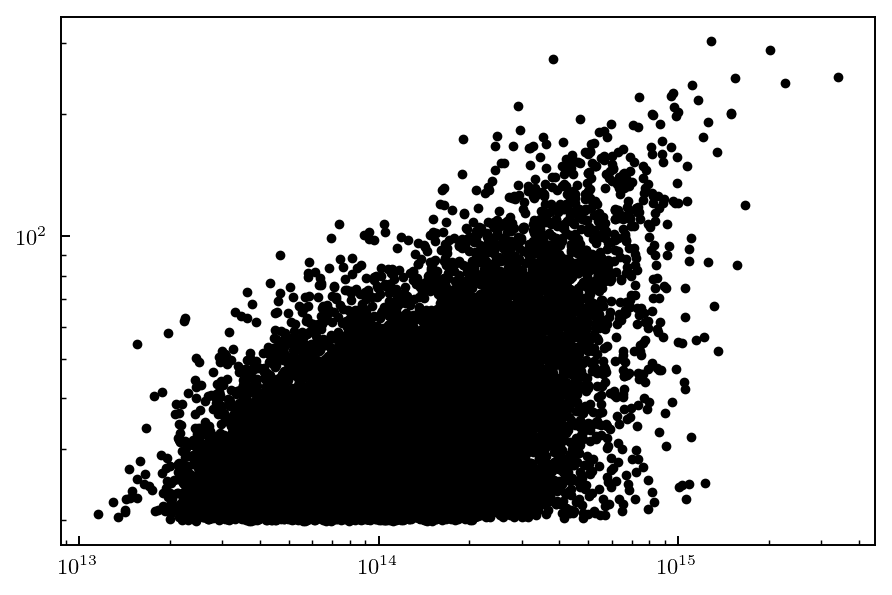

In [370]:
plt.plot( halos_M, richness,'k.')
plt.xscale('log'); plt.yscale('log')

### RedMapper catalog before matching. 

In [2]:
redM_data = bigdatadir+'Buzzard_Sims/v1.6/buzzard_halo/redM/'+'buzzard-0_1.6_y3_run_redmapper_v6.4.20_lgt20_vl02_catalog.fit'
redM_list = fits.open(redM_data)
redM_data = redM_list[1].data

print "Names of columns in redM_data are: \n"
print redM_data.names

print "Number of clusters is ", len(redM_data)
print "Lambda cut is ", min(redM_data.LAMBDA_CHISQ)

Names of columns in redM_data are: 

['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG', 'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z', 'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC', 'GEOMASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ', 'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE', 'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG', 'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT', 'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT', 'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT', 'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD']
Number of clusters is  24243
Lambda cut is  19.8967


### Halos before matching

In [250]:
#Only record array pickle file
import pickle
halos_file = bigdatadir + 'Buzzard_Sims/v1.6/buzzard_halo/halos/' + 'Chinchilla-0_halos_unique_lensedcoord.all.fits'
halos_list = fits.open(halos_file)
halos_data = halos_list[1].data

##Apply 5e13 mass cut
mcut = np.where(halos_data['M200B'] > 5e13)
halos_data = halos_data[mcut]

##Apply 5e13 mass cut
zcut = np.where(halos_data['Z'] < 0.9)
halos_data = halos_data[zcut]

##Apply sparse sampling
halos_data = halos_data[::200]

#Checking FITS into
#hrun_list.info()
print "Names of columns in halos_data are:"
print halos_data.dtype

#Converting FITS files into record array
#halos_data = np.array(halos_data, dtype=halos_data.dtype)
#halos_data = halos_data.view(np.recarray)

print "\n Number of halos is", len(halos_data.HALOID)

Names of columns in halos_data are:
(numpy.record, [('RA', '>f8'), ('TRA', '>f8'), ('DEC', '>f8'), ('TDEC', '>f8'), ('Z', '>f8'), ('HALOID', '>i8'), ('DESCID', '>i8'), ('MVIR', '>f8'), ('VMAX', '>f8'), ('VRMS', '>f8'), ('RVIR', '>f8'), ('RS', '>f8'), ('NP', '>f8'), ('PX', '>f8'), ('PY', '>f8'), ('PZ', '>f8'), ('VX', '>f8'), ('VY', '>f8'), ('VZ', '>f8'), ('JX', '>f8'), ('JY', '>f8'), ('JZ', '>f8'), ('SPIN', '>f8'), ('RS_KLYPIN', '>f8'), ('MVIR_ALL', '>f8'), ('M200B', '>f8'), ('M200C', '>f8'), ('M500C', '>f8'), ('M2500C', '>f8'), ('XOFF', '>f8'), ('VOFF', '>f8'), ('SPIN_BULLOCK', '>f8'), ('B_TO_A', '>f8'), ('C_TO_A', '>f8'), ('PID', '>i8'), ('LUMTOT', '>f8'), ('LUM20', '>f8'), ('LBCG', '>f8'), ('NGALS', '>i8'), ('N18', '>i8'), ('N19', '>i8'), ('N20', '>i8'), ('N21', '>i8'), ('N22', '>i8')])

 Number of halos is 1428


### Halo matched clusters in v.16 ZZhang+19

In [340]:
#Miscentering cut
import pickle

redM_halos = homedir + 'output/buzzard/redM_halos_noshape_v1.4_redMv1.6.data'
infile = open(redM_halos,'rb')
redM_halos = pickle.load(infile)
infile.close()

##Apply 5e13 mass cut
mcut = np.where(redM_halos['M200B'] > 5e13)
redM_halos = redM_halos[mcut]

#Apply sparse sampling
#redM_halos = redM_halos[::10]

##Apply 5e13 mass cut
zcut = np.where(redM_halos['Z'] < 0.9)
redM_halos = redM_halos[zcut]

redM_halos = redM_halos.view(np.recarray)
print redM_halos.dtype
print len(redM_halos)

(numpy.record, [('RA', '>f8'), ('TRA', '>f8'), ('DEC', '>f8'), ('TDEC', '>f8'), ('Z', '>f8'), ('HALOID', '>i8'), ('DESCID', '>i8'), ('MVIR', '>f8'), ('VMAX', '>f8'), ('VRMS', '>f8'), ('RVIR', '>f8'), ('RS', '>f8'), ('NP', '>f8'), ('PX', '>f8'), ('PY', '>f8'), ('PZ', '>f8'), ('VX', '>f8'), ('VY', '>f8'), ('VZ', '>f8'), ('JX', '>f8'), ('JY', '>f8'), ('JZ', '>f8'), ('SPIN', '>f8'), ('RS_KLYPIN', '>f8'), ('MVIR_ALL', '>f8'), ('M200B', '>f8'), ('M200C', '>f8'), ('M500C', '>f8'), ('M2500C', '>f8'), ('XOFF', '>f8'), ('VOFF', '>f8'), ('SPIN_BULLOCK', '>f8'), ('B_TO_A', '>f8'), ('C_TO_A', '>f8'), ('PID', '>i8'), ('LUMTOT', '>f8'), ('LUM20', '>f8'), ('LBCG', '>f8'), ('NGALS', '>i8'), ('N18', '>i8'), ('N19', '>i8'), ('N20', '>i8'), ('N21', '>i8'), ('N22', '>i8'), ('matching_ID', '<i8'), ('MEM_MATCH_ID', '<i8'), ('LAMBDA_CHISQ', '<f8'), ('RA_REDM', '<f8'), ('DEC_REDM', '<f8'), ('centered_flag', '<i8'), ('ID_CENT', '<i8'), ('BCG_ID', '<i8')])
19534


### Farahi16_Chinchilla_v1.9.9 matched clusters

### redM cluster v1.9.9

### Halos v.1.9.9

## Plotting the distribution of (M,z,\lambda) before and after matching.

In [281]:
#Create a dataframe containing the columns needed for plotting with seaborn
matched_df = pd.DataFrame()
unmatched_df = pd.DataFrame()

In [282]:
#Unmatched
unmatched_df['M200'] = np.log10(halos_data['M200B'])
unmatched_df['Z'] = halos_data['Z']
unmatched_df['category'] = 'Unmatched'

#Matched
matched_df['M200'] = np.log10(redM_halos['M200B'])
matched_df['Z'] = redM_halos['Z']
matched_df['category'] = 'Matched'

total_df = pd.concat([matched_df, unmatched_df])

In [360]:
#From: https://stackoverflow.com/questions/35920885/how-to-overlay-a-seaborn-jointplot-with-a-marginal-distribution-histogram-fr
from matplotlib.lines import Line2D

def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=1, scatter_size=4):
    plt.figure(figsize=(6,6))
    def colored_scatter(x, y, c=None):
        
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['edgecolor'] = c
            
            kwargs['alpha'] = scatter_alpha
            kwargs['s'] = scatter_size
            kwargs['facecolors'] = 'none' 
            kwargs['linewidth'] = 0.5
            kwargs['marker']= 'o'
            
            plt.scatter(*args, **kwargs)

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    
    
    color = ['blue','grey']
    legends=[]
    
    i=0
    for name, df_group in df.groupby(col_k):
        legends.append(name)
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color[i])
        )
        
        #g.ax_joint.set_xscale('log')
        g.ax_joint.set_xlabel(r'$\log_{10}({M_{200}})$', fontsize=16)
        g.ax_joint.set_ylabel('Z', fontsize=16)
        g.ax_joint.set_xlim(13.65,15.3)
        g.ax_joint.set_ylim(0,0.92)
        
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color[i],
            #hist = False,
            norm_hist =True,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            #hist=False,
            color=color[i],            
            vertical=True,
        )
    
        i+=1   
    '''
    # Do also global Hist:
    sns.distplot(
        df[col_x].values,
        ax=g.ax_marg_x,
        color='grey'
    )
    sns.distplot(
        df[col_y].values.ravel(),
        ax=g.ax_marg_y,
        color='grey',
        vertical=True
    )
    '''
    
    custom_lines = [Line2D([0], [0], color='blue', lw=2),
    Line2D([0], [0], color='grey', lw=2)]
    #Need to customize legends to make it more visible. 
    
    plt.legend(custom_lines, ['Matched', 'Unmatched'], fontsize=16)
    #plt.savefig('M_z_distribution.png')

<Figure size 432x432 with 0 Axes>

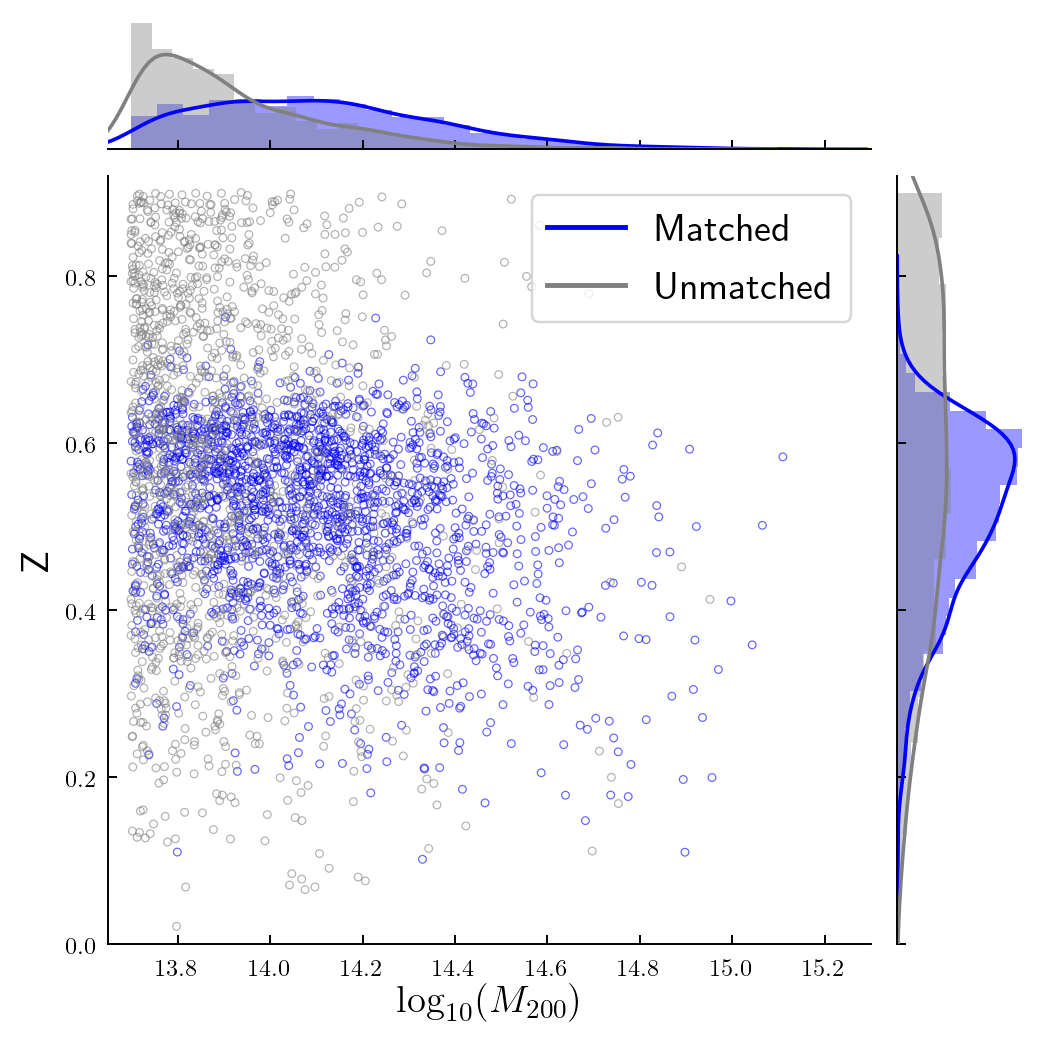

In [361]:
multivariateGrid('M200', 'Z', 'category', df=total_df, scatter_alpha=0.6, scatter_size=10)

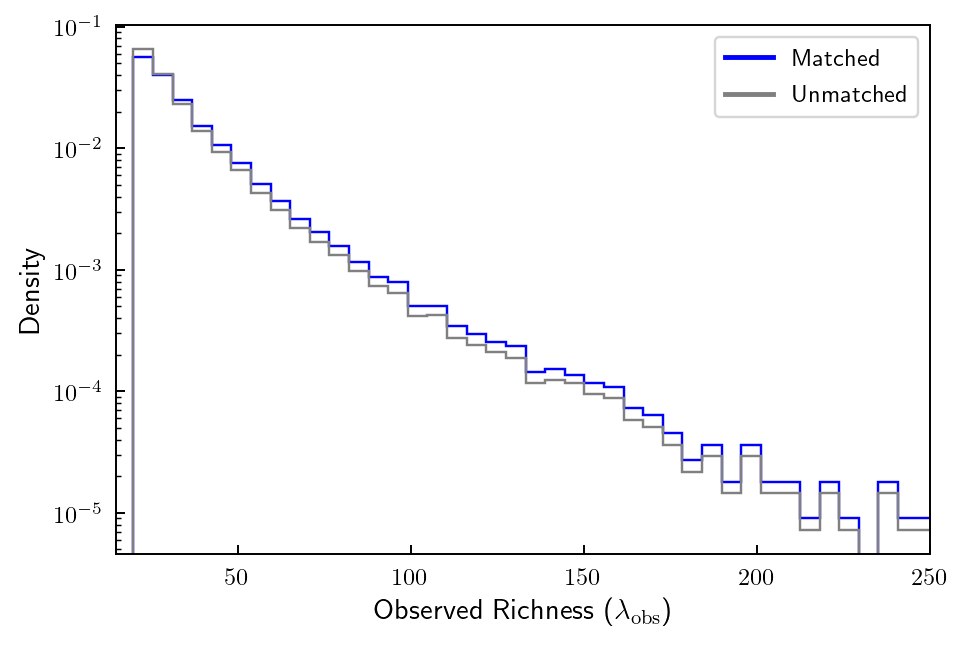

In [350]:
## Plotting the richness distribution of RM before and after matching. 
plt.figure(figsize=(6,4))
g = sns.distplot(redM_halos['LAMBDA_CHISQ'], norm_hist=True, color='blue', label='Matched', kde=False, \
                 hist_kws={"histtype":'step', "alpha": 1})
sns.distplot(redM_data['LAMBDA_CHISQ'], norm_hist=True, color='grey', label='Unmatched', kde=False, \
             hist_kws={"histtype":'step', "alpha": 1})



custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='grey', lw=2)]
    
plt.legend(custom_lines, ['Matched', 'Unmatched'])

plt.yscale('log')
plt.xlim([15,250])
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'Observed Richness ($\lambda_{\rm obs}$)', fontsize=12)
plt.savefig('lambda_distribution.png')
plt.show()

## Match best halo to cluster

In [8]:
#Find unique MEM_MATCH_IDs
uniq_cl_id = np.unique(matchedcl_membership['MEM_MATCH_ID'])
cl_ids = matchedcl_membership['MEM_MATCH_ID']
print uniq_cl_id, len(uniq_cl_id)

matched_ind = []
for i, cur_cl_id in enumerate(uniq_cl_id):
    
    cur_ids_ind = np.where(cl_ids == cur_cl_id)
    cur_cl = matchedcl_membership[cur_ids_ind]
    
    dummy_ind = np.argmax(cur_cl['Strength']) ## Find halo with highest strength
    cur_matched_ind = cur_cl[dummy_ind]['index'] ##Obtain index in the full array
    matched_ind.append(cur_matched_ind)
    
print len(matched_ind)
matchedcl_membership = matchedcl_membership[matched_ind] #Filter out the lower strength halos

[     1      2      3 ...  43100  86587 273420] 2849
2849


In [9]:
print "After filtering number of matched clusters is ", len(matchedcl_membership)

#Filter out non-unique halos
unique_ID, unique_ind = np.unique(np.unique(matchedcl_membership['HALOID']), return_index=True)
matchedcl_membership = matchedcl_membership[unique_ind]
print "Number of unique halo matches is ", len(matchedcl_membership)

After filtering number of matched clusters is  2849
Number of unique halo matches is  2848


In [10]:
## Match redM_data and halos_data onto unique
intersect1d, comm1, comm2 = np.intersect1d(matchedcl_membership['HALOID'], halos_data['ID'], \
      assume_unique=True, return_indices=True)
matchedcl_membership = matchedcl_membership[comm1]
halos_data = halos_data[comm2]
print len(matchedcl_membership), len(halos_data)

intersect1d, comm1, comm2 = np.intersect1d(matchedcl_membership['MEM_MATCH_ID'], redM_data['mem_match_id'], \
      assume_unique=True, return_indices=True)
matchedcl_membership = matchedcl_membership[comm1]
redM_data = redM_data[comm2]
print len(matchedcl_membership), len(redM_data)

373 373
373 373


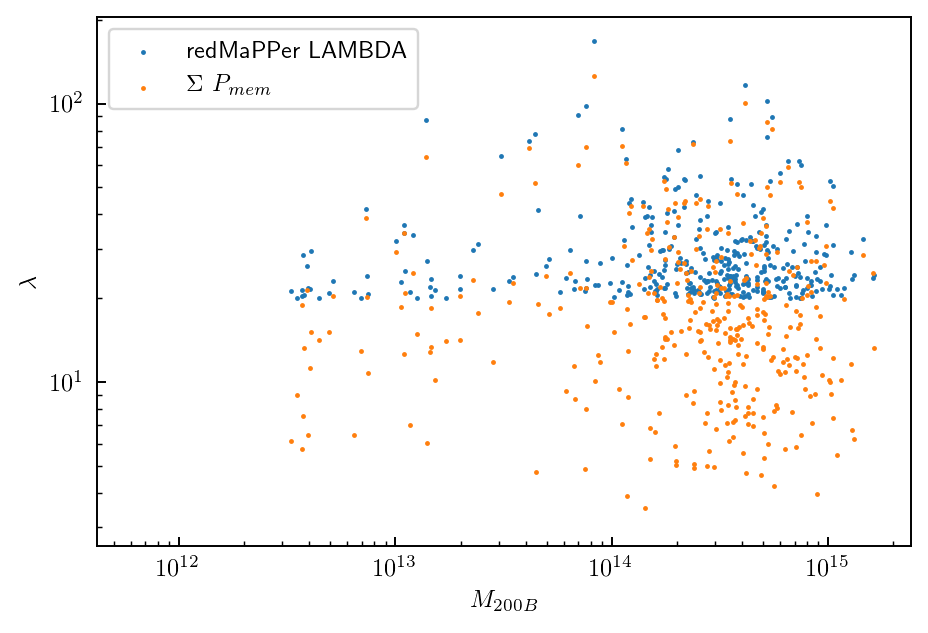

In [12]:
plt.scatter(halos_data['M200B'],redM_data['lambda'], s=1, label='redMaPPer LAMBDA')
plt.scatter(halos_data['M200B'],matchedcl_membership['PMEM'], s=1, label=r'$\Sigma~P_{mem}$')
plt.xscale('log'); plt.yscale('log')
plt.ylabel(r'$\lambda$'); plt.xlabel(r'$M_{200B}$')
plt.legend()
plt.show()

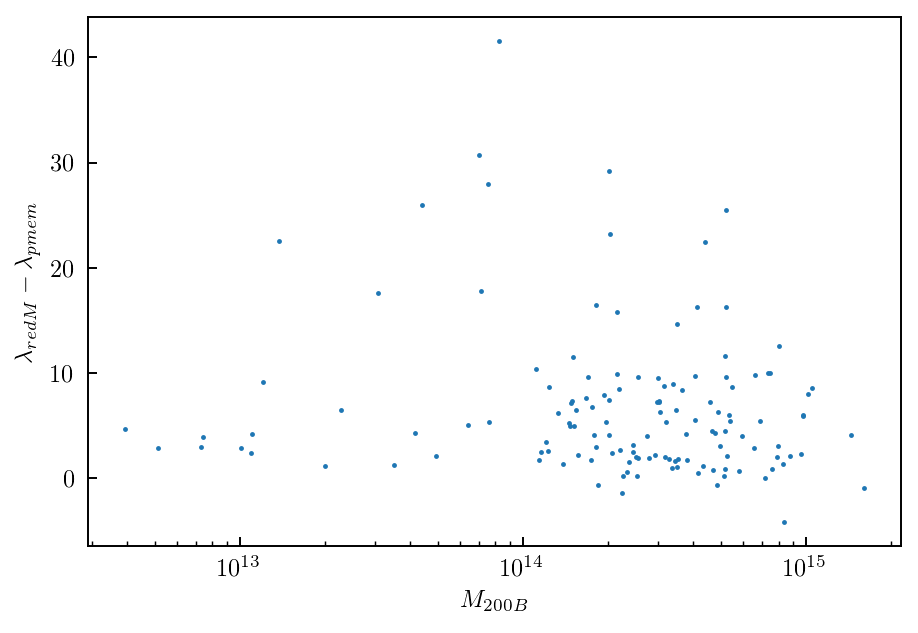

In [13]:
#Apply richness cut of 20 to pmem
dummy_ind = np.where(matchedcl_membership['PMEM'] > 20)
diff_lambda = redM_data['lambda'] - matchedcl_membership['PMEM']
diff_lambda_20cut = diff_lambda[dummy_ind]
m200b_20cut = halos_data['M200B'][dummy_ind]
plt.scatter(m200b_20cut, diff_lambda_20cut, s=1)
plt.xscale('log'); 
plt.ylabel(r'$\lambda_{redM} - \lambda_{pmem}$'); plt.xlabel(r'$M_{200B}$')
plt.show()



## Plot richness, mass, and redshift distribution of matched clusters.
### c.f. v1.9.9. of Arya Farahi 16 matching with v1.6 of halo-cluster matching

(array([0.03687509, 0.18500045, 0.35312585, 0.91687721, 1.73000418,
        2.6931315 , 3.4806334 , 3.86000932, 1.46875355, 0.06187515]),
 array([0.08983899, 0.15746923, 0.22509946, 0.2927297 , 0.36035994,
        0.42799017, 0.49562041, 0.56325065, 0.63088088, 0.69851112,
        0.76614136]),
 <a list of 10 Patch objects>)

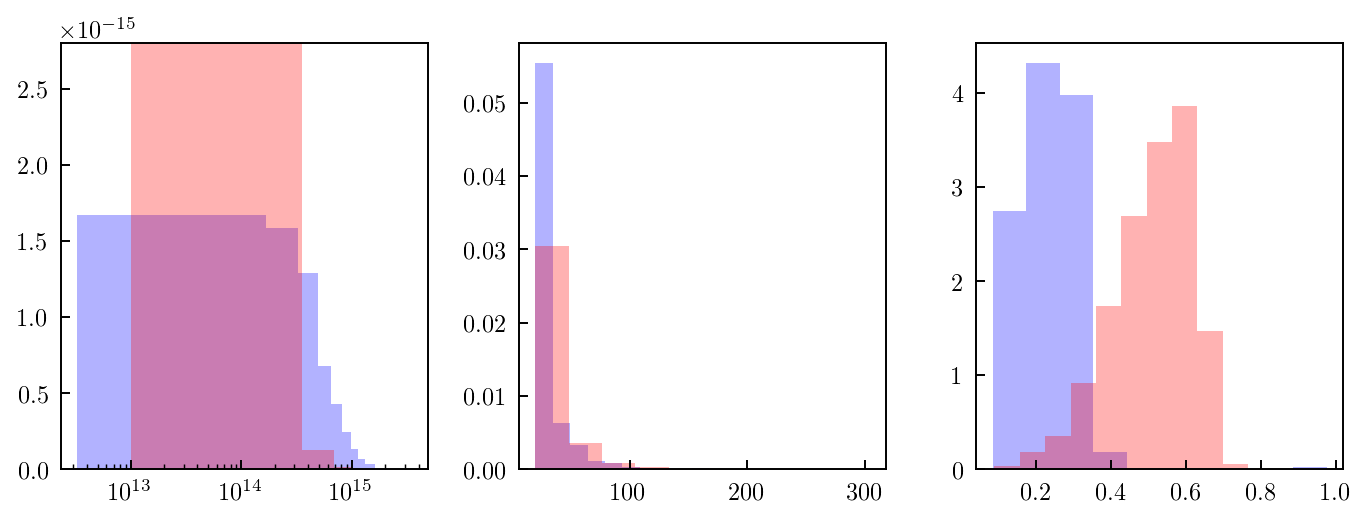

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(8,3))
plt.tight_layout()

#Mass distribution
ax[0].hist(halos_data['M200B'], density=True, alpha=0.3, color='blue')
ax[0].hist(redM_halos_ZZhang.M200B, density=True, alpha=0.3, color='red')
ax[0].set_xscale('log')

#Mass distribution
ax[1].hist(redM_data['lambda'], density=True, alpha=0.3, color='blue')
ax[1].hist(redM_halos_ZZhang.LAMBDA_CHISQ, density=True, alpha=0.3, color='red')

#Mass distribution
ax[2].hist(halos_data['Z'], density=True, alpha=0.3, color='blue')
ax[2].hist(redM_halos_ZZhang.Z, density=True, alpha=0.3, color='red')